<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/48_Heart_Diased_RegLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
'''
import os
print(os.listdir('../input'))
POR SI TENEMOS EL DATASET EN LA PC
'''

"\nimport os\nprint(os.listdir('../input'))\nPOR SI TENEMOS EL DATASET EN LA PC\n"

In [3]:
url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/heart.csv'

heart_diase = pd.read_csv(url)

heart_diase.head()

'''
Data contains;

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)
'''

'\nData contains;\n\nage - age in years\nsex - (1 = male; 0 = female)\ncp - chest pain type\ntrestbps - resting blood pressure (in mm Hg on admission to the hospital)\nchol - serum cholestoral in mg/dl\nfbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\nrestecg - resting electrocardiographic results\nthalach - maximum heart rate achieved\nexang - exercise induced angina (1 = yes; 0 = no)\noldpeak - ST depression induced by exercise relative to rest\nslope - the slope of the peak exercise ST segment\nca - number of major vessels (0-3) colored by flourosopy\nthal - 3 = normal; 6 = fixed defect; 7 = reversable defect\ntarget - have disease or not (1=yes, 0=no)\n'

In [4]:
# Exploration data

print(heart_diase.target.value_counts())
heart_diase[heart_diase['target'] == 1]
heart_diase[heart_diase.target == 0]

1    165
0    138
Name: target, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


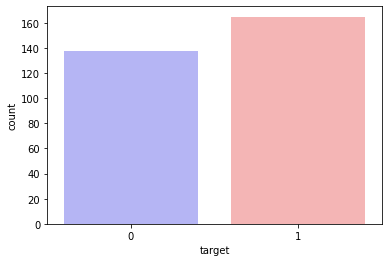

"\nsns.countplot() --> nos grafica la cantidad de datos en patelas segun un objetivo y datos\n- x --> este parameto en para ingresar el objetivo que contara\n- data --> aca ingresamos el conjunto de datos o DataFrame\n- palette --> 'bwr' es para dar colores mas calido(mas bonito), sin esto se ve medio feo color mglearn\nLO BUENO DE USAR ESTO ES QUE POR DEFECTO SEABORN YA AGREGA LOS LABEL EN X ^ Y POR DEFECTO, AHORRANDONOS LINEAS;\nAL IGUAL QUE SUS TICKS EN X(MUY BUENO SEABORN)\n"

In [5]:
# Ahora graficaremos los datos de tipo target(solo veremos la cantidad de estos en barras)

sns.countplot(x=heart_diase.target, data=heart_diase, palette='bwr')
plt.show()

'''
sns.countplot() --> nos grafica la cantidad de datos en patelas segun un objetivo y datos
- x --> este parameto en para ingresar el objetivo que contara
- data --> aca ingresamos el conjunto de datos o DataFrame
- palette --> 'bwr' es para dar colores mas calido(mas bonito), sin esto se ve medio feo color mglearn
LO BUENO DE USAR ESTO ES QUE POR DEFECTO SEABORN YA AGREGA LOS LABEL EN X ^ Y POR DEFECTO, AHORRANDONOS LINEAS;
AL IGUAL QUE SUS TICKS EN X(MUY BUENO SEABORN)
'''

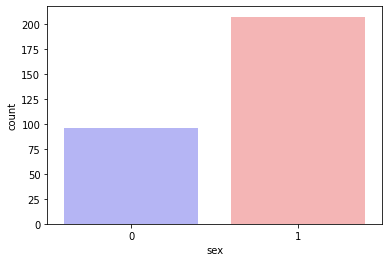

In [6]:
sns.countplot(x=heart_diase.sex, data=heart_diase, palette='bwr')

In [7]:
# Ahorra aremos un conteo de los humanos xd que tienen enfermedad y lo imprimiremos en porcentual

countnoDiase = len(heart_diase[heart_diase.target == 0])
counthaveDiase = len(heart_diase[heart_diase.target == 1])
target_count = list(heart_diase.target.value_counts()) # cuenta los diferentes target de mayor a menor(usar cuando dominemos)

print("Percentage of patients haven't heart diase: {:.2f}%".format((countnoDiase / len(heart_diase.target) * 100)))
print('Percentage of patients have heart diase: {:.2f}%'.format((counthaveDiase / len(heart_diase.target) * 100)))

# Alternative
#print('{:.2f}'.format((target_count[0] / len(heart_diase)* 100)))
#print('{:.2f}'.format((target_count[1] / len(heart_diase)* 100)))

Percentage of patients haven't heart diase: 45.54%
Percentage of patients have heart diase: 54.46%


Percentage of females patients: 31.68%
Number of females: 96
Percentage of males patients: 68.32%
Number of males: 207


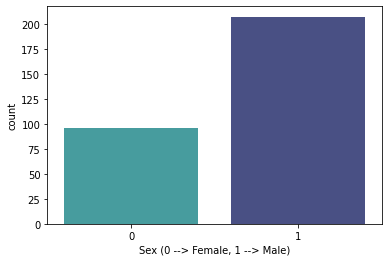

In [8]:
# Ahora contamos el sexo de todas las personas e imprimimos la cantidad de hombres y mujeres in porcentual

print('Percentage of females patients: {:.2f}%'.format((len(heart_diase[heart_diase.sex == 0]) / len(heart_diase)) * 100))
print('Number of females: {}'.format(len(heart_diase[heart_diase.sex == 0])))
print('Percentage of males patients: {:.2f}%'.format((len(heart_diase[heart_diase.sex == 1]) / len(heart_diase.sex)) * 100))
print('Number of males: {}'.format(len(heart_diase[heart_diase.sex == 1])))

sns.countplot(x=heart_diase.sex, data=heart_diase, palette='mako_r')
plt.xlabel('Sex (0 --> Female, 1 --> Male)')
plt.show()

In [9]:
# Realizamos un groupby segun target y sacamos la media de todas las features. 
# groupby separa los datos iguales segun la feature que le pases, para luego realizar calculos con este

heart_diase.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


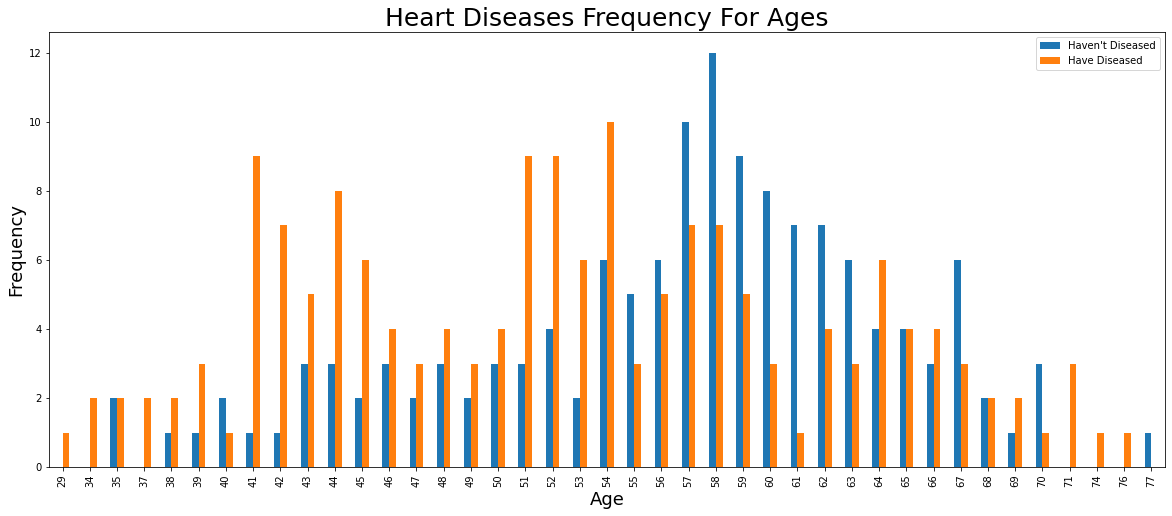

"\npd.crosstab() --> calcula una matriz de frecuencia por edades segun este caso\n- primer parametro ->  eje x parametro absisa\n- second parametro -> eje y la frecuencia\n\ndel grafico\n\nen el eje 'y' se muestra la cantidad de personas con heart diase ^ en el eje x la edad\n"

In [10]:
# graficaremos la frecuencia por edad de personas que estan enfermas del corazon

pd.crosstab(heart_diase.age, heart_diase.target).plot(kind='bar', figsize=(20, 8))
plt.xticks(c='black')
plt.yticks(c='black')
plt.xlabel('Age', size=18)
plt.ylabel("Frequency", size=18)
plt.title('Heart Diseases Frequency For Ages', size=25)
plt.savefig('FrequencyForAgesHeartDiseases.png')
plt.legend(["Haven't Diseased", 'Have Diseased'])
plt.show()



'''
pd.crosstab() --> calcula una matriz de frecuencia por edades segun este caso
- primer parametro ->  eje x parametro absisa
- second parametro -> eje y la frecuencia

del grafico

en el eje 'y' se muestra la cantidad de personas con heart diase ^ en el eje x la edad
'''

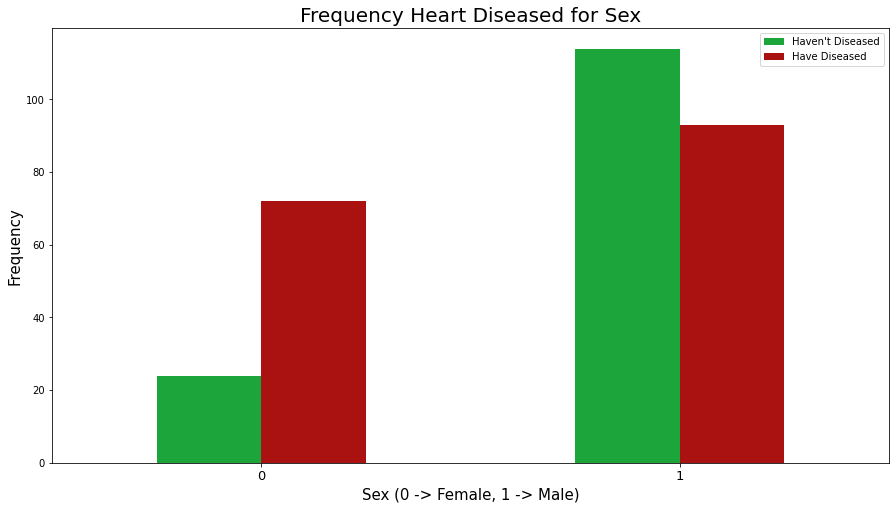

In [11]:
# frequency de las personas con heart diase segun el sexo.

pd.crosstab(heart_diase.sex, heart_diase.target).plot(kind='bar', figsize=(15,8), color=['#1CA53B','#AA1111' ])
plt.xticks(rotation=0, size=13)
plt.title('Frequency Heart Diseased for Sex', size=20)
plt.legend(["Haven't Diseased", 'Have Diseased'])
plt.xlabel('Sex (0 -> Female, 1 -> Male)', size=15)
plt.ylabel('Frequency', size=15)
plt.savefig('FrequencyHeartDiseasedForSex.png')
plt.show()

# ['#1CA53B','#AA1111' ] -> color bandera de la paz xd; [0]-verde(m), [1]-red;guindo(m)

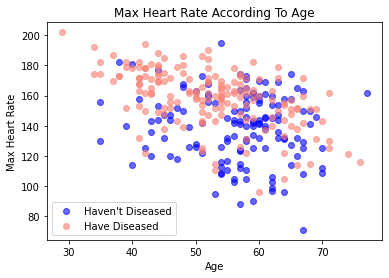

In [12]:
'''
graficamos las personas que tienen ^ que no tienen heart diseases
blue -> havent's heart diseased but yes suffered from heart rate
salmon -> have heart diseased ant too suffered from heart rate
'''

plt.scatter(x=heart_diase.age[heart_diase.target == 0], y=heart_diase.thalach[heart_diase.target == 0], c='blue', alpha=.6)
plt.scatter(x=heart_diase.age[heart_diase.target == 1], y=heart_diase.thalach[heart_diase.target == 1], c='salmon', alpha=.6)
plt.legend(["Haven't Diseased", 'Have Diseased'], loc=3)
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Max Heart Rate According To Age')
plt.savefig('MaxHeartRateAccordingToAge.png')
plt.show()

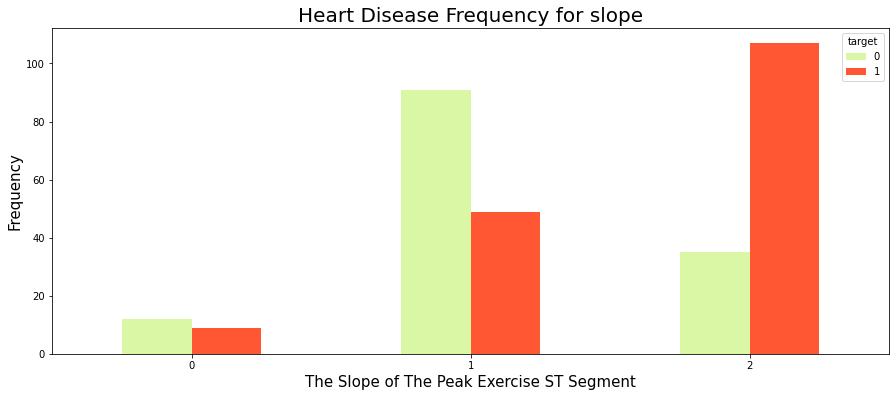

In [13]:
'''
Frecuencia de enfermedad cardíaca para pendiente, esto es la frecuencia con que tenian
algo parecido a un paro cardiaco o es lo que creo
'''

pd.crosstab(heart_diase.slope, heart_diase.target).plot(kind='bar', figsize=(15,6), color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for slope', size=(20))
plt.xlabel('The Slope of The Peak Exercise ST Segment', size=15)
plt.ylabel('Frequency', size=15)
plt.xticks(rotation = 0)
plt.savefig('HeartDiseaseFrequencyForSlope.png')
plt.show()

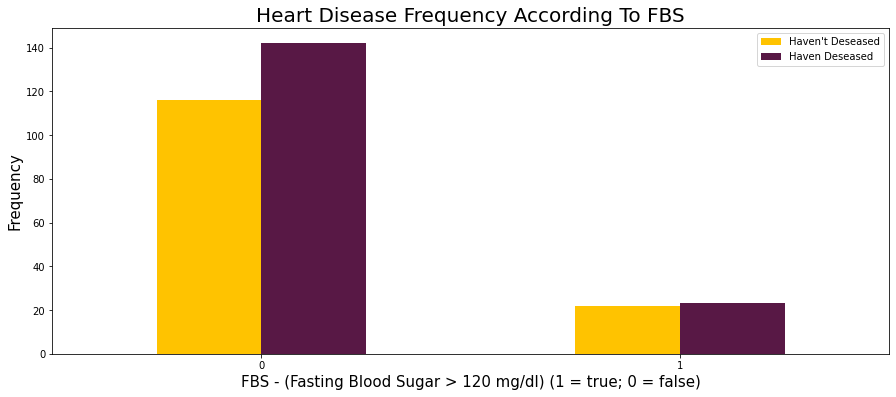

In [14]:
pd.crosstab(heart_diase.fbs, heart_diase.target).plot(kind='bar', figsize=(15,6), color=['#FFC300','#581845' ])
plt.xticks(rotation=0)
plt.title('Heart Disease Frequency According To FBS', size=20)
plt.legend(["Haven't Deseased", 'Haven Deseased'])
plt.ylabel('Frequency', size=15)
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)', size=15)
plt.savefig('FrequencyHeartDiseasedForFBS.png')
plt.show()

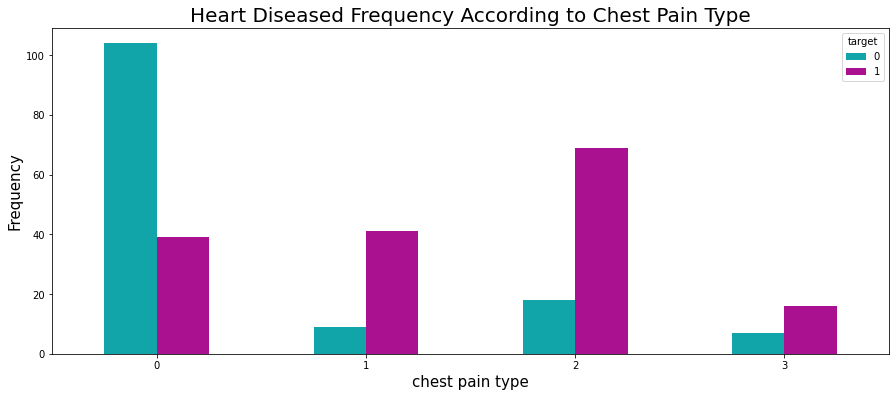

In [15]:
# Frequency segun el tipo de dolor pecho

pd.crosstab(heart_diase.cp, heart_diase.target).plot(kind='bar', figsize=(15,6), color=['#11A5AA','#AA1190' ])
plt.xticks(rotation=0)
plt.ylabel('Frequency', size=15)
plt.xlabel('chest pain type', size=15)
plt.title('Heart Diseased Frequency According to Chest Pain Type', size=20)
plt.savefig('HeartDiseasedFrequencyAccordingToChestPainType.png')
plt.show()

In [16]:
heart_diase.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# CREATING DUMMY VARIABLES

'''
Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.
Como 'cp', 'thal' y 'pendiente' son variables categóricas, las convertiremos en variables ficticias.
'''

a = pd.get_dummies(heart_diase.cp, prefix='cp')
b = pd.get_dummies(heart_diase.thal, prefix='thal')
c = pd.get_dummies(heart_diase.slope, prefix='slope')
# converte los datos a datos ficticios

frame = [heart_diase, a, b, c]

heart = pd.concat(frame, axis = 1)

heart.head()

'''
pd.concat() --> es una funcion que concatena los datos segun axes que le pase, en si tranforma a un ps.DataFrame
ya sea por ejemplo una lista de python,
axis=1 horizontal, axis=0 vertical
'''
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [18]:
heart = heart.drop(columns=['cp','thal','slope'])
heart.head()

# MUYJEan lo hciste eres pro, aca acaba el preprocesamiento de los datos, ahora creamos el modelo de machine learning

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [19]:
# Crating model machine learnning

'''
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.
Podemos usar la biblioteca sklearn o podemos escribir funciones nosotros mismos. Vamos a los dos. En primer lugar, escribiremos nuestras funciones y luego utilizaremos la biblioteca sklearn para calcular la puntuación.
'''

y = heart.target.values
# Extraendo los datos de nuestros target

x_data = heart.drop(['target'], axis=1)
# Guardando nuestros datos en la variable x_data, droping target




In [20]:
# Normalize data
# x = (data - data.min) / (data.max - data.min)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

'''
segun la ecuacion para normalizar datos, lo apply aqui transforma nuestros datos en un rango donde los datos esten bajo
el mismo rango, para que le modelo realize mejores predicciones
'''
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [21]:
# We will split our data. 80% of our data will be train data and 20% of it will be test data.

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.2)

# Tramspose matrices

X_train = X_train.T 
X_test = X_test.T 
y_train = y_train.T 
y_test = y_test.T 

X_train.head()

,74,153,64,296,287,286,236,126,73,20,46,160,232,181,27,173,261,37,101,166,233,184,164,206,248,253,293,76,272,238,137,106,284,44,139,247,288,156,297,252,...,163,151,244,202,31,32,127,185,280,273,147,278,177,99,197,243,115,265,72,25,165,289,174,291,39,193,88,70,87,292,242,277,211,9,195,251,192,117,47,172
age,0.291667,0.770833,0.604167,0.708333,0.583333,0.625000,0.604167,0.375000,0.458333,0.625000,0.312500,0.562500,0.541667,0.750000,0.458333,0.604167,0.479167,0.520833,0.625000,0.791667,0.729167,0.437500,0.187500,0.625000,0.520833,0.791667,0.791667,0.458333,0.791667,1.000000,0.687500,0.833333,0.666667,0.208333,0.729167,0.770833,0.583333,0.375000,0.625000,0.687500,...,0.187500,0.875000,0.562500,0.604167,0.750000,0.312500,0.791667,0.312500,0.270833,0.604167,0.645833,0.604167,0.729167,0.500000,0.791667,0.583333,0.166667,0.770833,0.000000,0.875000,0.791667,0.541667,0.645833,0.604167,0.750000,0.645833,0.520833,0.520833,0.354167,0.604167,0.729167,0.583333,0.666667,0.583333,0.625000,0.291667,0.520833,0.562500,0.375000,0.604167
sex,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
trestbps,0.264151,0.490566,0.433962,0.283019,0.566038,0.377358,0.292453,0.169811,0.433962,0.386792,0.433962,0.245283,0.622642,0.528302,0.150943,0.358491,0.169811,0.528302,0.792453,0.245283,0.245283,0.528302,0.415094,0.150943,0.924528,0.056604,0.547170,0.292453,0.245283,0.292453,0.320755,0.622642,0.433962,0.433962,0.320755,0.622642,0.150943,0.339623,0.660377,0.415094,...,0.415094,0.169811,0.358491,0.528302,0.245283,0.339623,0.547170,0.169811,0.396226,0.056604,0.528302,0.396226,0.433962,0.339623,0.292453,0.547170,0.245283,0.169811,0.339623,0.622642,0.622642,0.320755,0.339623,0.188679,0.622642,0.481132,0.150943,0.245283,0.066038,0.716981,0.481132,0.283019,0.245283,0.528302,0.716981,0.358491,0.245283,0.245283,0.415094,0.245283
chol,0.198630,0.347032,0.194064,0.162100,0.242009,0.178082,0.397260,0.178082,0.308219,0.246575,0.248858,0.260274,0.372146,0.226027,0.111872,0.223744,0.237443,0.242009,0.328767,0.235160,0.273973,0.267123,0.111872,0.257991,0.358447,0.394977,0.196347,0.271689,0.253425,0.406393,0.187215,0.246575,0.184932,0.445205,0.312785,0.273973,0.477169,0.289954,0.114155,0.383562,...,0.111872,0.052511,0.132420,0.328767,0.116438,0.212329,0.344749,0.374429,0.431507,0.246575,0.260274,0.440639,0.477169,0.273973,0.292237,0.337900,0.203196,0.196347,0.178082,0.401826,0.365297,0.180365,0.182648,0.438356,0.534247,0.356164,0.200913,0.301370,0.162100,0.226027,0.196347,0.308219,0.305936,0.095890,0.456621,0.276256,0.141553,0.152968,0.299087,0.360731
fbs,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
# Let's say weight = 0.01 and bias = 0.0
# digamos un peso = 0.01 ^ bias = 0.0

# initialize
# np.full((tuple-dimensiones), contenido) // las dimensiones para np.full(), se cuentan desde 1
def initialize(dimension):

  weight = np.full((dimension, 1), 0.01)
  bias = 0.0

  return  weight, bias

# Creando Funcion Sigmoid
# devuelve el valore de la funcion sigmoide con el valor ingresado
def sigmoid(z):

  y_head = 1 / (1 + np.exp(-z))

  return y_head



In [23]:
## Forward and Backward Propagation, propragacion hacia adelante y hacia atras
'''
By the way in formulas;

h0(x^i)= y_head
y^i = y_train
x^i = x_train
'''

def forwardBackward(weight, bias, x_train, y_train):

  # Forward
  y_head = sigmoid(np.dot(weight.T, x_train) + bias) # y_head is h_teta(x^(i))
  # Loss of cost funtion
  loss = -(y_train * np.log(y_head)) + (1 - y_train) * np.log(1 - y_head)
  # Cost
  # usamos el shape 1 por el orden de nuestro datos etiquetas estan en filas
  cost = np.sum(loss) / x_train.shape[1]
  # --end forward

  # Backward
  derivative_weights = np.dot(x_train, ((y_head - y_train).T)) / x_train.shape[1]
  derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
  gradients = {'Derivative Weights': derivative_weights, 'Derivative Bias' : derivative_bias}

  return cost, gradients


In [24]:
def Update(weight, bias, x_train, y_train, LearningRate, iteration):

  costList = []
  
  index = []

  # For each iteraction, update weight and bias values
  for _ in range(iteration):

    cost, gradients = forwardBackward(weight, bias, x_train, y_train)

    weight = weight - LearningRate * gradients['Derivative Weights']

    bias = bias - LearningRate * gradients['Derivative Bias']

    costList.append(cost)

    index.append(_)

  parameters = {'weight':weight, 'bias':bias}

  print('Iteration',iteration)
  print('cost',cost)

  plt.plot(index, costList)
  plt.ylabel('Cost')
  plt.xlabel('Number of iteration')
  plt.show()

  return parameters, gradients

In [25]:
def predict(weight, bias, x_test):

  z = np.dot(weight.T, x_test) + bias

  y_head = sigmoid(z)

  y_prediction = np.zeros((1, x_test.shape[1]))

  for _ in range(y_head.shape[1]):

    if y_head[0,_] <= .5:
      
      y_prediction[0,_] == 0

    else:

      y_prediction[0,_] == 1

  return y_prediction


Iteration 100
cost -0.009978192046849615


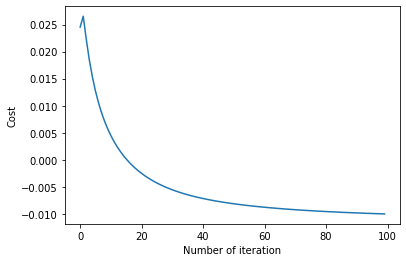

Test accuracy 44.26


In [26]:
def logistic_regression(x_train, y_train, x_test, y_test, LearningRate, iteration):

  dimension = x_train.shape[0]

  weight, bias = initialize(dimension)

  parameters, gradients = Update(weight, bias, x_train, y_train, LearningRate, iteration)

  y_prediction = predict(parameters['weight'], parameters['bias'], x_test)

  print('Test accuracy {:.2f}'.format((100 - np.mean(np.abs(y_prediction - y_test)) * 100)))


logistic_regression(X_train, y_train, X_test, y_test, 1, 100)

In [27]:
accuracy = {}

lr = LogisticRegression().fit(X_train.T, y_train.T)

acc = lr.score(X_test.T, y_test.T) * 100

accuracy['Logistic Regression'] = acc

print('Test accuries {:.2f}%'.format(acc))

Test accuries 86.89%


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train.T, y_train.T)

prediction = knn.predict(X_test.T)

print('{} n_kneighbors; test accuracy {:.2f}'.format(2, knn.score(X_test.T, y_test.T)*100))

2 n_kneighbors; test accuracy 88.52


Test accuracy KNN 88.52%


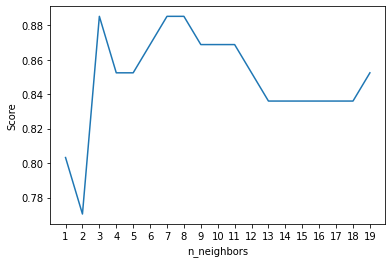

In [29]:
# score's for our model machine learning

scoreList = []

for _ in range(1,20):

  knn_2 = KNeighborsClassifier(n_neighbors = _).fit(X_train.T, y_train.T)
  scoreList.append(knn_2.score(X_test.T, y_test.T))

acc = max(scoreList) * 100
accuracy['KNeighborsClasifier'] = acc
print('Test accuracy KNN {:.2f}%'.format(acc))

plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.show()

In [30]:
# Support machine vector

from sklearn.svm import SVC

svm = SVC(random_state = 0).fit(X_train.T, y_train.T)

acc = svm.score(X_test.T, y_test.T) * 100

accuracy['SVC'] = acc

print('Test accuracy SVC {:.2f}%'.format(acc))

Test accuracy SVC 88.52%


In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train.T, y_train.T)

acc = nb.score(X_test.T, y_test.T) * 100

accuracy['Naive Bayes'] = acc

print('Test accuracy Naive Bayes {:.2f}%'.format(acc))

Test accuracy Naive Bayes 86.89%


In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3).fit(X_train.T, y_train.T)

acc = dtc.score(X_test.T, y_test.T) * 100

accuracy['Decision Tree Classifier'] = acc

print('Test accuracy Decision Tree Classifier {:.2f}'.format(acc))

Test accuracy Decision Tree Classifier 85.25


In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=3).fit(X_train.T, y_train.T)

acc = rfc.score(X_test.T, y_test.T) * 100

accuracy['Random Forest Classifier'] = acc

print('Test accuracy Random Forest Classifier {:.2f}%'.format(acc))

Test accuracy Random Forest Classifier 88.52%


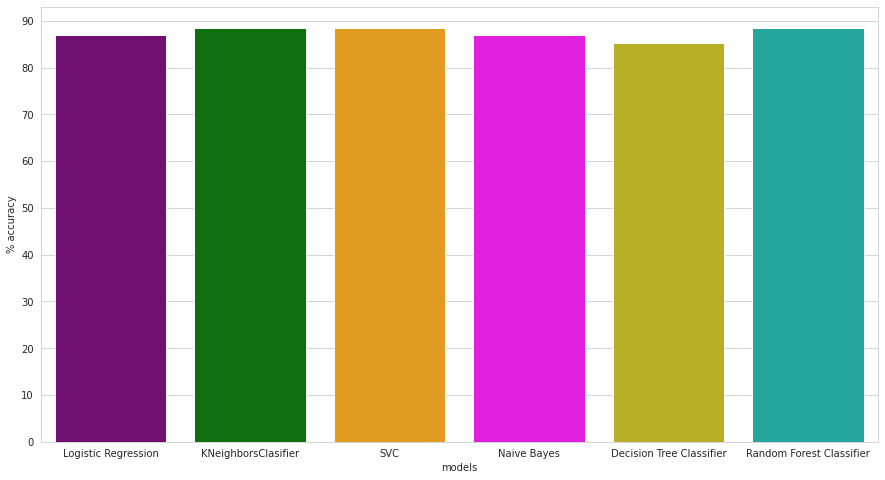

In [34]:
# comparando modelos

colors = ['purple', 'green', 'orange', 'magenta', '#CFC60E', '#0FBBAE']

sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
plt.ylabel('% accuracy')
plt.xlabel('models')
plt.yticks(np.arange(0, 100, 10))
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette=colors)
plt.show()

In [37]:
# confusion matrix
y_head_lr = lr.predict(X_test.T)
knn3 = KNeighborsClassifier(n_neighbors = 3).fit(X_train.T, y_train.T)
y_head_knn = knn3.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_dtc = dtc.predict(X_test.T)
y_head_rfc = rfc.predict(X_test.T)
y_head_nb = nb.predict(X_test.T)

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test.T, y_head_lr)
cm_knn = confusion_matrix(y_test.T, y_head_knn)
cm_svm = confusion_matrix(y_test.T, y_head_svm)
cm_dtc = confusion_matrix(y_test.T, y_head_svm)
cm_rfc = confusion_matrix(y_test.T, y_head_rfc)
cm_nb = confusion_matrix(y_test.T, y_head_nb)



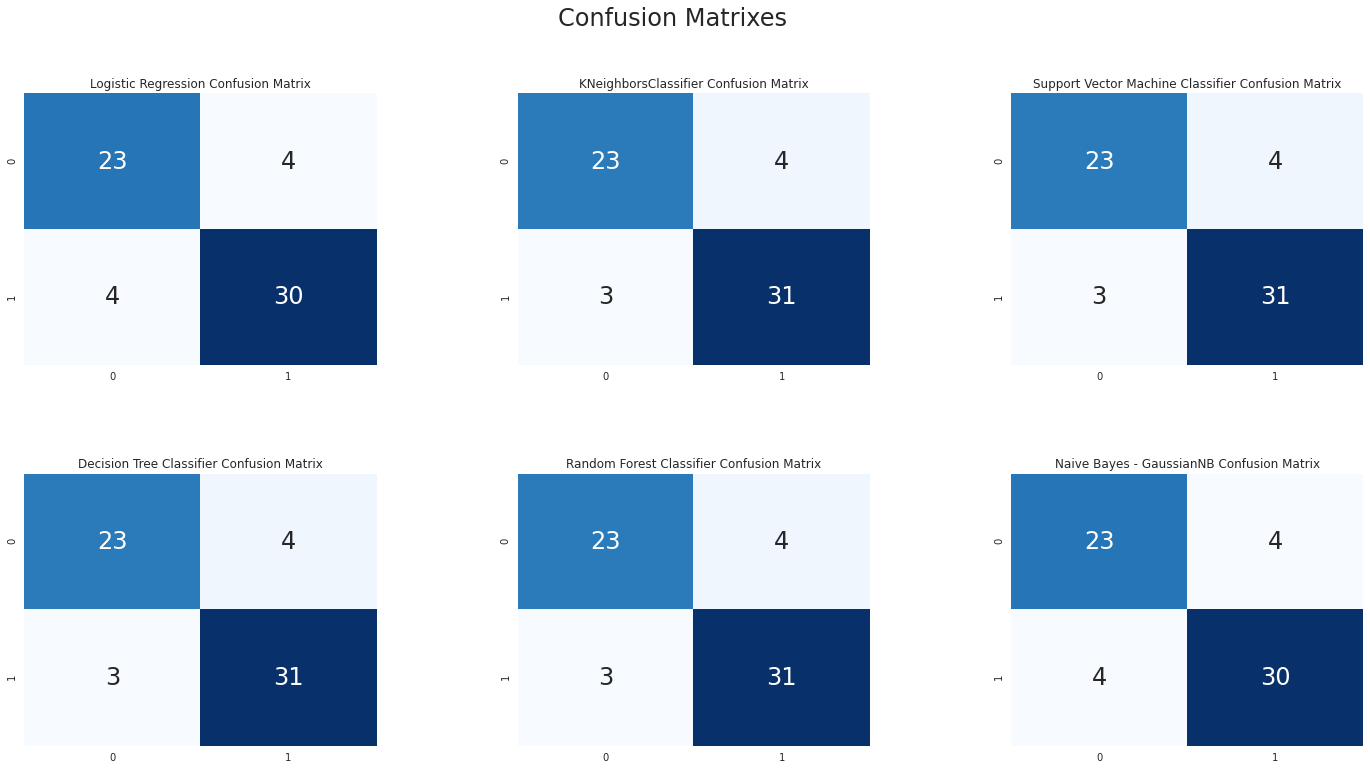

In [87]:
# Creamos nuestra hoja para graficar multiples confusies matrixes
plt.figure(figsize=(24,12))
# Titulo ^ tamano
plt.suptitle('Confusion Matrixes', fontsize=24)
plt.subplots_adjust(wspace=.4, hspace=.4)

plt.subplot(2,3,1)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size':24})


plt.subplot(2,3,2)
plt.title('KNeighborsClassifier Confusion Matrix')
sns.heatmap(cm_knn, cmap='Blues', annot=True, cbar=False, fmt='d', annot_kws={'size':24})

plt.subplot(2,3,3)
plt.title('Support Vector Machine Classifier Confusion Matrix')
sns.heatmap(cm_svm, cmap='Blues', cbar=False, annot=True, annot_kws={'size':24}, fmt='d')

plt.subplot(2,3,4)
plt.title('Decision Tree Classifier Confusion Matrix')
sns.heatmap(cm_dtc, annot=True, fmt='d', cbar=False, cmap='Blues', annot_kws={'size':24})

plt.subplot(2,3,5)
plt.title('Random Forest Classifier Confusion Matrix')
sns.heatmap(cm_rfc, annot=True, cmap='Blues', cbar=False, fmt='d', annot_kws={'size':24})

plt.subplot(2,3,6)
plt.title('Naive Bayes - GaussianNB Confusion Matrix')
sns.heatmap(cm_nb, cmap='Blues', annot=True, fmt='d', annot_kws={'size':24}, cbar=False)